# Codigo Ejercicio 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftshift,fftfreq
plt.rcParams.update( { 'font.size':16, 'figure.figsize': (16,9) } )

In [4]:
def calcular_fft( x_c, Fs, N ):
    if( type( N ) != int ):
        resultados = {
            'N': [],
            'X': [],
            'shift_X': [],
            'freq': []
        }
        for N_ in N:
            resultado = calcular_fft( x_c, Fs, N )
            resultados['N'].append( N_ )
            resultados['freq'].append( resultado['freq']  )
            resultados['X'].append( resultado['X'] )
            resultados['shift_X'].append( resultado['shift_X'] )
    else:        
        n = np.arange( 0, N, 1 )
        x = lambda n: x_c( n / Fs )
        x_e = x(n)
        X = fft( x_e ) / N
        freq = fftshift( fftfreq( N ) ) * Fs
        resultados = {
            'X': X,
            'shift_X': fftshift( X ),
            'freq': freq
        }
    
    return resultados

In [5]:
Fs = 400
x_c = lambda t: np.sin(200 *np.pi*t)
x = lambda n: np.sin( np.pi * n / 2 )  

In [6]:
X = calcular_fft( x_c, Fs, 4 )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


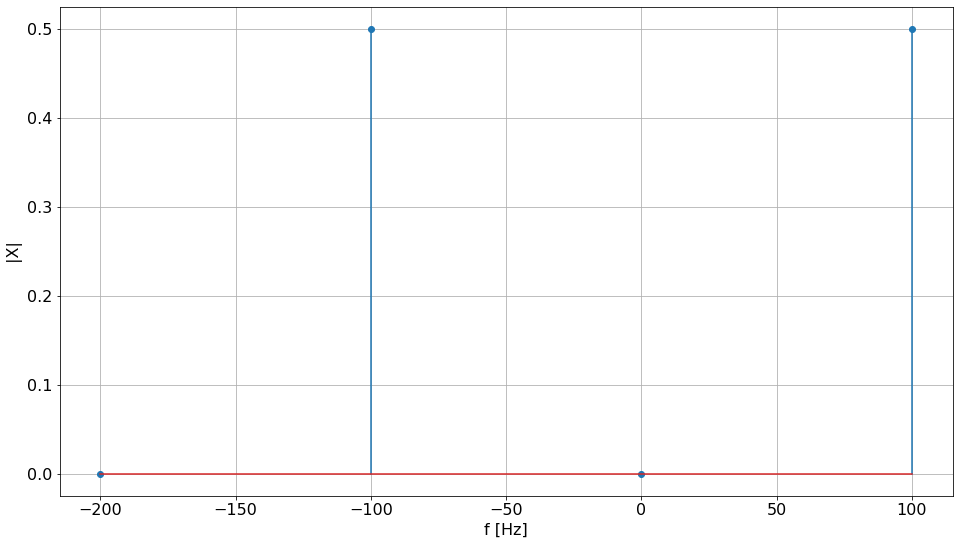

In [7]:
plt.stem( X['freq'] ,np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


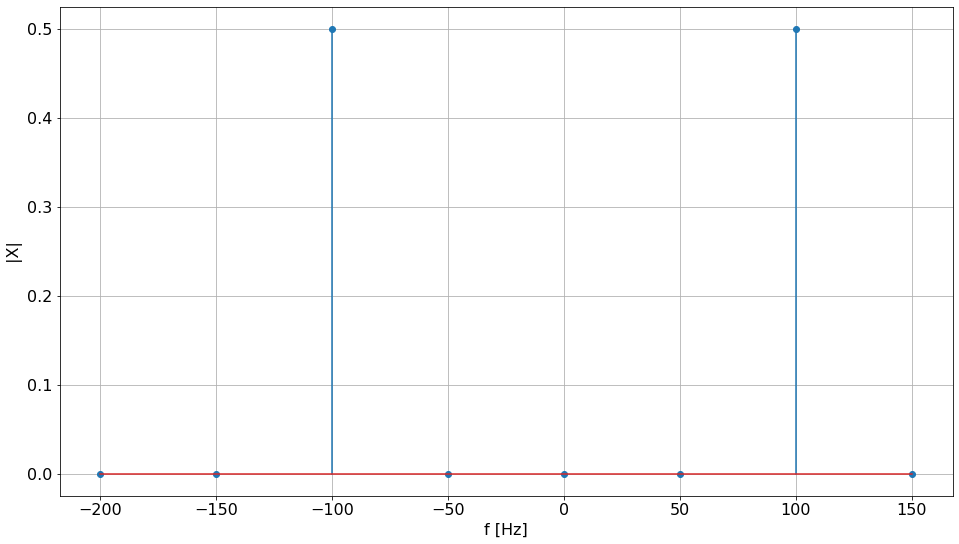

In [8]:
X = calcular_fft( x_c, Fs, 8 )
plt.stem( X['freq'],np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()
plt.savefig( './Img/punto_2_d.png' )

## e)

In [9]:
X = calcular_fft( x_c, Fs, 5 )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


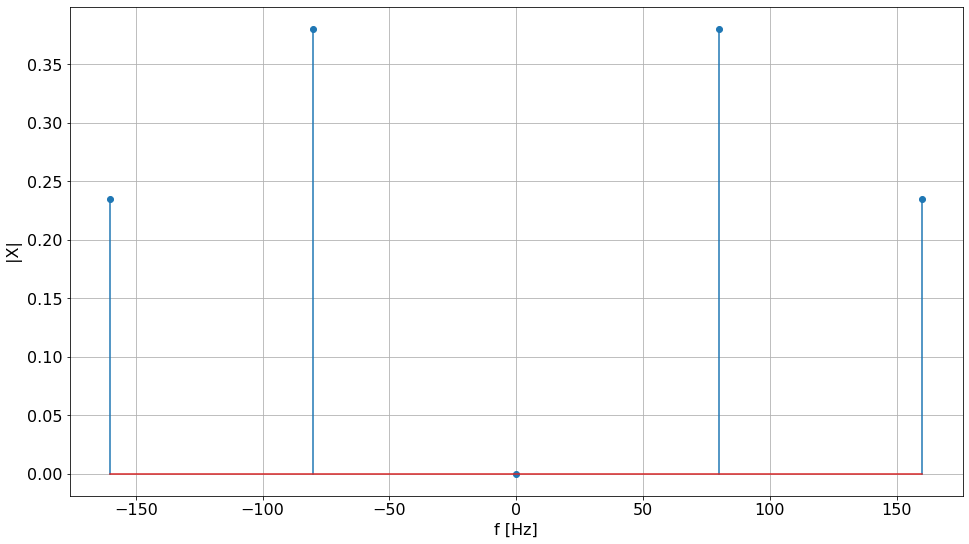

In [10]:
plt.stem( X['freq'] ,np.abs( X['shift_X'] ) )
plt.xlabel( 'f [Hz]' )
plt.ylabel( ' |X| ' )

plt.grid()
plt.savefig( './Img/punto_2_e.png' )

## g)

In [11]:
escalon = lambda t: np.piecewise( t, t>=0, [1,0] )
x_1 = lambda t: 4 * np.sin(2000 * np.pi *t) +3 * np.sin(4000*np.pi * t)+ 2 * np.sin( 6000 *np.pi * t )
x_2 = lambda t:  np.sum( [escalon( t + 2 - 10*k ) * escalon( 2 - t + 10*k ) for k in range( -100, 100 ) ], axis=0 )

In [16]:
def graficar_CTFS( x_c, Fs, N, path=None ):
    X_datos = calcular_fft( x_c, Fs, N )
    fig, axs = plt.subplots(2, 1)
    f = X_datos['freq']
    X = X_datos['shift_X']
    axs[0].stem( f, np.abs(X) )
    axs[0].set_xlabel( 'f [Hz]' )
    axs[0].set_ylabel( '|X|' )
    axs[0].grid()
    
    axs[1].stem( f, np.angle( X ) )
    axs[1].set_xlabel( 'f [Hz]' )
    axs[1].set_ylabel( 'arg(X)' )
    axs[1].grid()
    
    if( path ):
        plt.savefig( path )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


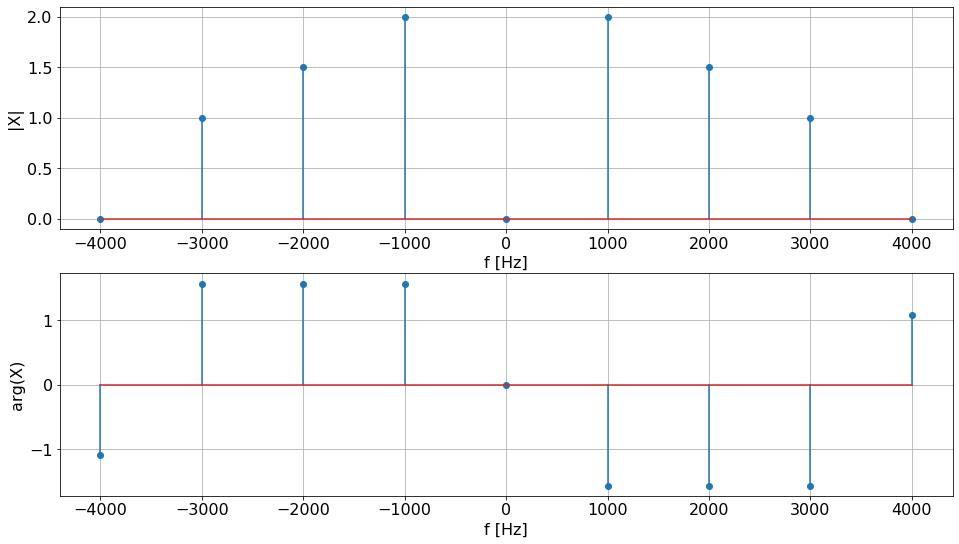

In [17]:
graficar_CTFS( x_1, 9000, 9, './Img/punto_2_g_1.png' )

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


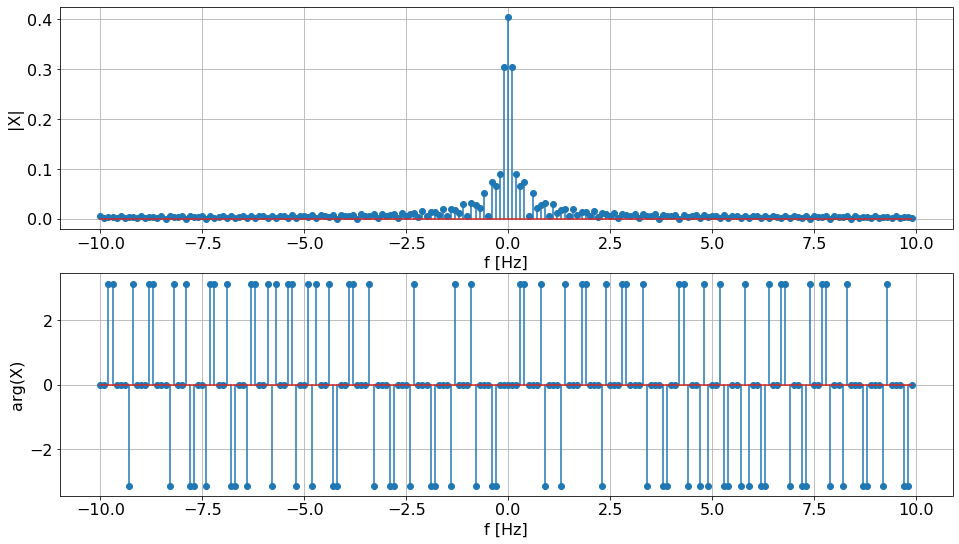

In [18]:
graficar_CTFS( x_2, 20, 200, './Img/punto_2_g_2.png' )